## Import Library

In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

### Create some fake data

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [9]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.05)
    loss_func = torch.nn.MSELoss()

    for t in range(2000):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
        if t%10 == 0:
            plt.figure(1, figsize=(10, 3))
            plt.subplot(131)
            plt.title('Net1')
            plt.scatter(x.data.numpy(), y.data.numpy())
            plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
            plt.pause(0.1) # 加這個以方便暫停，才能分段做圖
    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [10]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

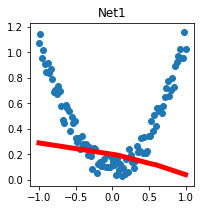

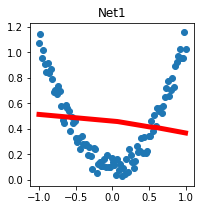

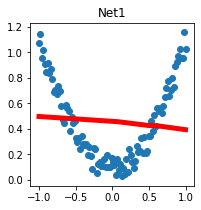

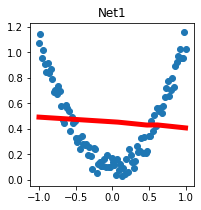

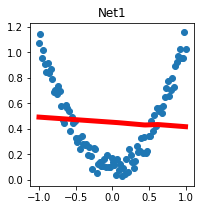

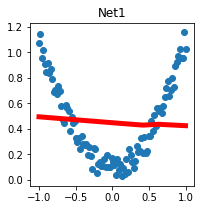

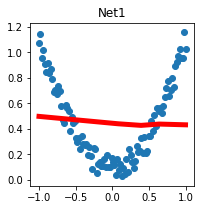

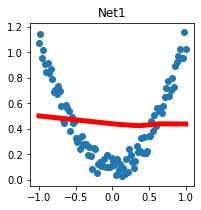

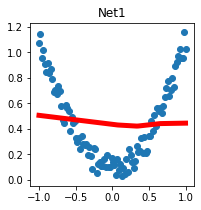

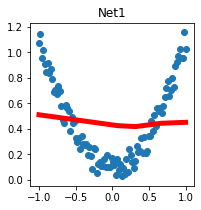

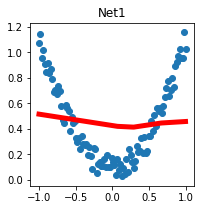

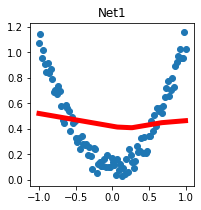

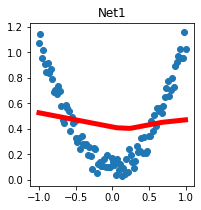

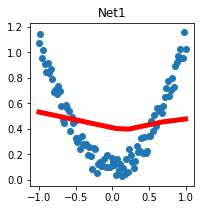

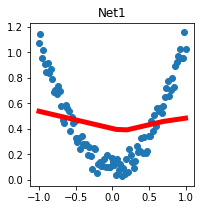

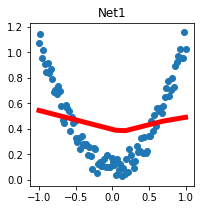

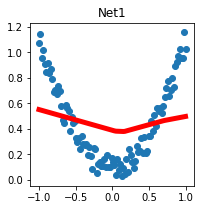

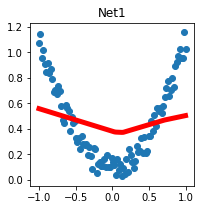

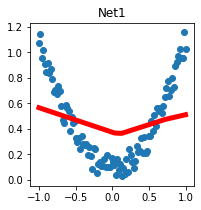

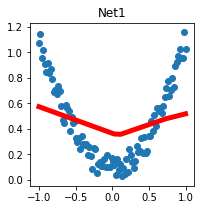

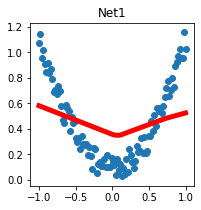

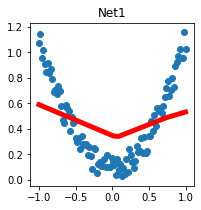

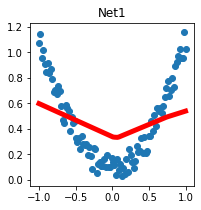

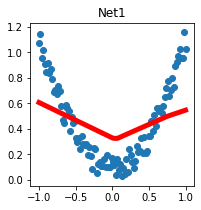

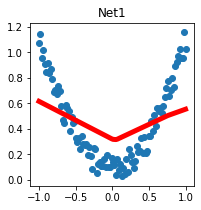

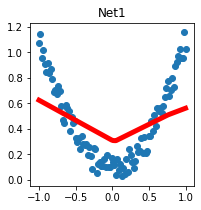

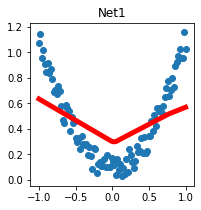

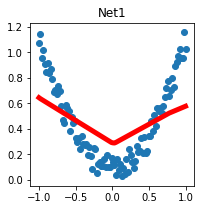

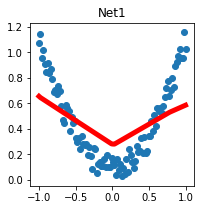

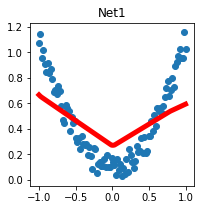

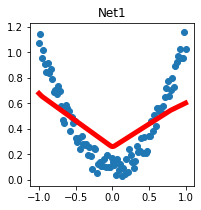

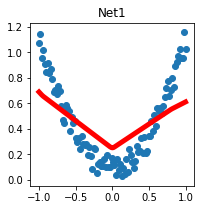

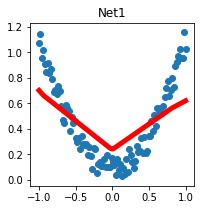

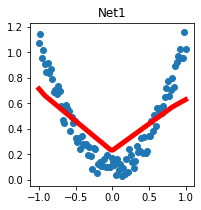

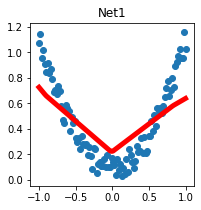

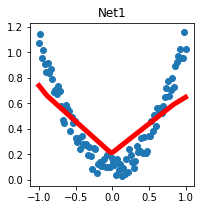

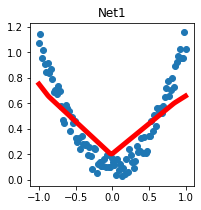

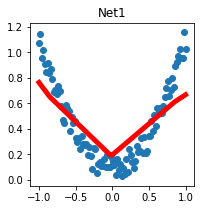

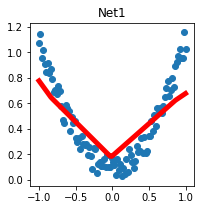

In [ ]:
# save the model
save()
# restore the model
restore_net()